# Linear Regression

- All about approximating the linear function on our data
https://github.com/Santara/ML-MOOC-NPTEL/blob/master/lecture1/ML-Anirban_Tutorial1.ipynb - note book link for all models

y = wx+b # linear

y = W1x1 + W2x2 + b # multiple 

### Regression line

It is the line which make sure sum of the squared vertical distances b/w the data points and line is as `small` as possible  **`sum of the squared errors is minimum`**


#### learning parameters :
-         **w and b**

we will update the learning parameters by several **iterative methods**

1) Delta method or LMS method

#### Cost Function: 
-  It should be minimum as possible
- cost function is a measure of `how wrong the model is in terms of its ability to estimate the relationship between X and y`. This is typically expressed as a difference or **distance between the predicted value and the actual value**


####  Gradient Descent:

https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/ - reference

Gradient descent is an optimization algorithm often used for finding the weights or coefficients of machine learning algorithms, such as artificial neural networks and logistic regression.
- The goal of the algorithm is to find model parameters (e.g. coefficients or weights) that minimize the error of the model on the training dataset. 

######  Stochastic Gradient Descent:

- SGD, is a variation of the gradient descent algorithm that calculates the error and **updates the model for each example** in the training dataset. effective than BGD

###### Batch Gradient Descent :

- Batch gradient descent is a variation of the gradient descent algorithm that calculates the error for each example in the training dataset, but only **updates the model after all training examples have been evaluated**.

##### Mini-Batch Gradient Descent:
- Mini-batch gradient descent is a variation of the gradient descent algorithm that splits the **training dataset into small batches that are used to calculate model error and update model coefficients**.

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
<ul>
    <li> <h6>Mean absolute error:</h6> It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.</li>
    <li><h6> Mean Squared Error (MSE):</h6> Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> <h6>Root Mean Squared Error (RMSE):</h6> This is the square root of the Mean Square Error. </li>
    <li><h6>R-squared</h6> is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
</ul>

# Code implementation - Type 1

In [9]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

Prepare data
------------
First  preparing some data for linear regression. To keep things simple we will assume we have a single input feature. Let us use the following function to generate our data:
$$y = \frac{x}{2}+sin(x)+\epsilon$$
Where $\epsilon \sim \mathcal{N}(0,1)$ is Gaussian noise.

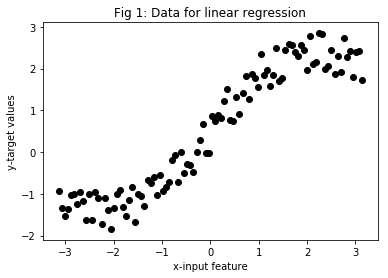

In [2]:
number_of_samples = 100

x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)   # deriving y

plt.scatter(x,y,color='black') #Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 1: Data for linear regression')
plt.show()

### Split the dataset into training, validation and test sets
we do a $70\%-15\%-15\%$ random split of the data between the training, validation and test sets respectively.

In [3]:
random_indices = np.random.permutation(number_of_samples)
#Training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

Fit a line to the data
----------------------
Linear regression learns to fit a `hyperplane to our data in the feature space`. For one dimensional data, the hyperplane reduces to a **straight line**. We will fit a line to our data using [__sklearn.linear_model.LinearRegression__](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [5]:
model = LinearRegression()

#sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))

#Fit the line to the training data
model.fit(x_train_for_line_fitting, y_train_for_line_fitting)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

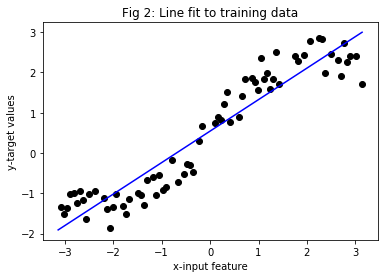

In [6]:
#Plot the line
plt.scatter(x_train, y_train, color='black')
plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 2: Line fit to training data')
plt.show()

Evaluate the model
------------------
Now that we have our model ready, we must evaluate our model.

In a linear regression scenario, its common to evaluate the model in terms of the **_mean squared error_** on the validation and test sets.

In [8]:
mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )

print ('Validation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)

Validation MSE:  3.904775742866956 
Test MSE:  3.49877494296559


# Code implementation - Type 2 

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [6]:
# Downloading the data
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-12-12 08:54:41--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

100%[======================================>] 72,629      --.-K/s   in 0.1s    

2019-12-12 08:54:42 (474 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



###### Understanding the data

In [7]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Simple Linear Regression

### Data Exploration

In [14]:
df.describe() # default excludes categorical columns

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [15]:
df.describe(include=[np.object])

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV 4X4,MID-SIZE,A6,X
freq,90,8,178,222,514


In [24]:
considerable_features = ['ENGINESIZE','MODELYEAR','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']

In [57]:
con_df = df[considerable_features]
con_df.head()

,ENGINESIZE,MODELYEAR,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,2014,4,8.5,196
1,2.4,2014,4,9.6,221
2,1.5,2014,4,5.9,136
3,3.5,2014,6,11.1,255
4,3.5,2014,6,10.6,244


## Visualization

In [63]:
#X = con_df[['ENGINESIZE']]


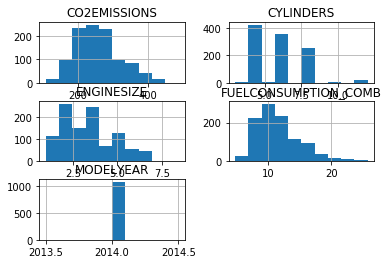

In [29]:
con_df.hist()
plt.show()

In [30]:
# We are not getting anything from Model year as the data completely belongs to 2014 model vehicles will skip model column

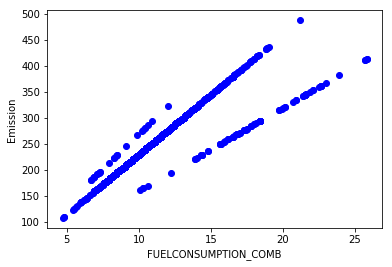

In [32]:
plt.scatter(con_df.FUELCONSUMPTION_COMB, con_df.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

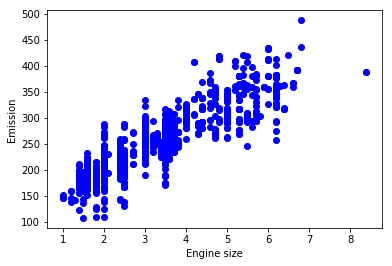

In [33]:
plt.scatter(con_df.ENGINESIZE, con_df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

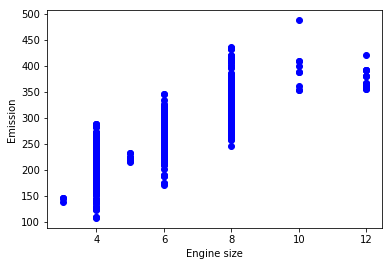

In [35]:
# write your code here
plt.scatter(con_df.CYLINDERS, con_df.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Simple Linear Regression

In [116]:
from sklearn.model_selection import train_test_split
X = con_df[['ENGINESIZE']]
y = con_df[['CO2EMISSIONS']]
y_plot = con_df[['CO2EMISSIONS']]
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [108]:
# will consider emissions based on fuel consumptions
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()

lin_reg.fit(X_trainset,y_trainset)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [109]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[39.46811192]]
[123.50160745]


In [110]:
 #y_trainset

Text(0, 0.5, 'Emission')

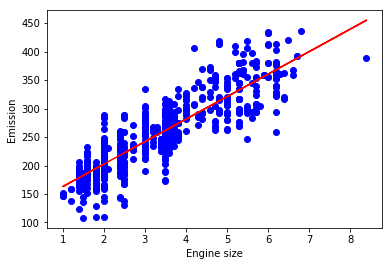

In [111]:
plt.scatter(X_trainset.ENGINESIZE, y_trainset,  color='blue')
plt.plot(X_trainset, lin_reg.coef_[0][0]*X_trainset + lin_reg.intercept_[0], '-r') # hypothesis line
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [112]:
# plt.plot(X_trainset, lin_reg.coef_[0][0]*X_trainset + lin_reg.intercept_[0], '-r')

In [113]:
from sklearn.metrics import r2_score

test_x = X_testset
test_y = y_testset
test_y_hat = lin_reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 21.90
Residual sum of squares (MSE): 892.50
R2-score: 0.71


<h2 id="multiple_regression_model">Multiple Regression Model</h2>

It will take input as more than one feature

In [114]:
X = con_df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y = con_df[['CO2EMISSIONS']]
X_trainset1, X_testset1, y_trainset1, y_testset1 = train_test_split(X, y, test_size=0.3, random_state=3)

In [115]:
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()

lin_reg.fit(X_trainset1,y_trainset1)

print(lin_reg.coef_)
print(lin_reg.intercept_)

# Evaluation

from sklearn.metrics import r2_score

test_x = X_testset1
test_y = y_testset1
test_y_hat = lin_reg.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

[[12.34216943  6.24723795  9.6862707 ]]
[66.04052266]
Mean absolute error: 15.97
Residual sum of squares (MSE): 510.13
R2-score: 0.85


## Polynomial Regression
Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):


$y = b + \theta_1  x + \theta_2 x^2$

Now, the question is: how we can fit our data on this equation while we have only x values, such as __Engine Size__? 
Well, we can create a few additional features: 1, $x$, and $x^2$.



__PolynomialFeatures()__ function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 

In [118]:
from sklearn.model_selection import train_test_split
X = con_df[['ENGINESIZE']]
y = con_df[['CO2EMISSIONS']]

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [127]:
X.shape

(1067, 1)

In [134]:
# transforming the input features
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

train_x = np.asanyarray(X_trainset)
train_y = np.asanyarray(y_trainset)

test_x = np.asanyarray(X_testset)
test_y = np.asanyarray(y_testset)


poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.5 ,  6.25],
       [ 1.  ,  3.7 , 13.69],
       [ 1.  ,  3.  ,  9.  ],
       ...,
       [ 1.  ,  1.4 ,  1.96],
       [ 1.  ,  2.5 ,  6.25],
       [ 1.  ,  2.  ,  4.  ]])

In [135]:
print(train_x.shape)
print(train_x_poly.shape)
print(train_y.shape)
print(y_trainset.shape)

(746, 1)
(746, 3)
(746, 1)
(746, 1)


**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$

in our example

$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$

In [136]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         50.98372028 -1.5426381 ]]
Intercept:  [105.33582659]


Text(0, 0.5, 'Emission')

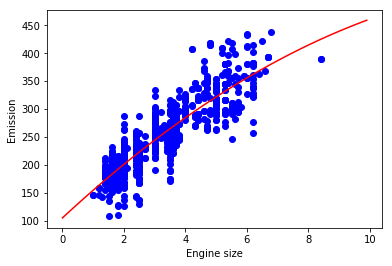

In [137]:
# plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
# XX = np.arange(0.0, 10.0, 0.1)
# yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
# plt.plot(XX, yy, '-r' )
# plt.xlabel("Engine size")
# plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

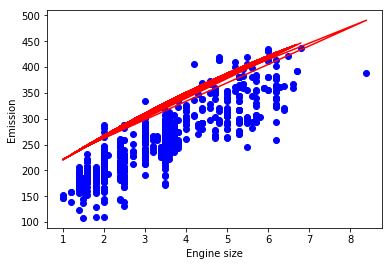

In [139]:
# plt.scatter(X_trainset.ENGINESIZE, y_trainset,  color='blue')
# plt.plot(X_trainset, clf.intercept_[0]+ clf.coef_[0][1]*(X_trainset)+ clf.coef_[0][2]*np.power(X_trainset, 2) + lin_reg.intercept_[0], '-r') # hypothesis line
# plt.xlabel("Engine size")
# plt.ylabel("Emission")

In [140]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 21.98
Residual sum of squares (MSE): 882.97
R2-score: 0.72
